In [1]:
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt

In [2]:
parquet_file=r"C:/Users/user/Music/IMPALA3/alarms_df.parquet"

In [3]:
df=pd.read_parquet(parquet_file,engine="auto")
df

,patient_id,signal,threshold,start_time,end_time,duration,value,count
0,B-N-0001,SPO2,90,2022-07-12 10:07:18,2022-07-12 10:12:30,312.0,84.0,310
1,B-N-0001,SPO2,90,2022-07-12 10:12:35,2022-07-12 10:12:44,9.0,89.0,10
2,B-N-0001,SPO2,90,2022-07-12 10:12:49,2022-07-12 10:13:07,18.0,89.0,18
3,B-N-0001,SPO2,90,2022-07-12 10:15:51,2022-07-12 10:16:53,62.0,89.0,62
4,B-N-0001,SPO2,90,2022-07-12 10:17:00,2022-07-12 10:17:07,7.0,89.0,8
...,...,...,...,...,...,...,...,...
2741512,Z-H-0387,SPO2HR,70,2023-07-01 17:31:03,2023-07-01 17:31:05,2.0,62.0,3
2741513,Z-H-0387,SPO2HR,70,2023-07-01 17:34:11,2023-07-01 17:34:12,1.0,31.0,2
2741514,Z-H-0387,SPO2HR,70,2023-07-01 23:49:26,2023-07-01 23:49:28,2.0,64.0,5
2741515,Z-H-0387,SPO2HR,150,2023-07-02 09:21:01,2023-07-02 09:21:02,1.0,198.0,3


In [4]:
import pandas as pd

# Assuming the data is stored in a DataFrame called df

# Total alarms per patient
total_alarms_per_patient = df.groupby('patient_id').size().reset_index(name='total_alarms')

# Total alarms per patient for critical conditions (ECGHR > 220 or ECGRR > 100)
critical_conditions = df[(df['signal'] == 'ECGHR') & (df['value'] > 220) | (df['signal'] == 'ECGRR') & (df['value'] > 100)]
critical_alarms_per_patient = critical_conditions.groupby('patient_id').size().reset_index(name='critical_alarms')

# Merge the two DataFrames to combine total alarms and critical alarms per patient
total_alarms_summary = pd.merge(total_alarms_per_patient, critical_alarms_per_patient, on='patient_id', how='left').fillna(0)

print(total_alarms_summary)


    patient_id  total_alarms  critical_alarms
0     B-N-0001           709              0.0
1     B-N-0002          1215              1.0
2     B-N-0003          3571             36.0
3     B-N-0004          2192              6.0
4     B-N-0006         27650             35.0
..         ...           ...              ...
765   Z-H-0383          4909             17.0
766   Z-H-0384          8191              0.0
767   Z-H-0385            94              0.0
768   Z-H-0386          1064              1.0
769   Z-H-0387          2171              1.0

[770 rows x 3 columns]


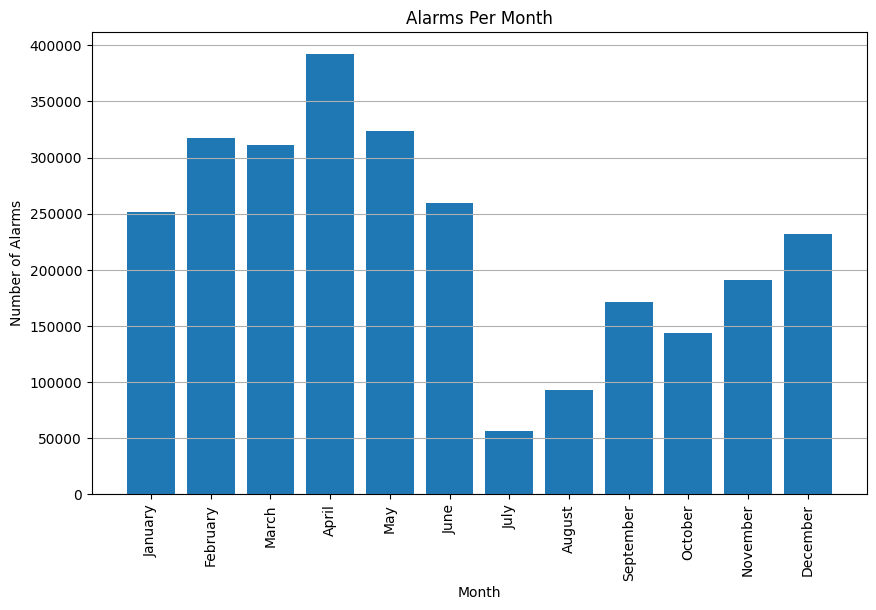

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Convert 'start_time' column to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract month from 'start_time'
df['month'] = df['start_time'].dt.month

# Group by month and count number of alarms
alarms_per_month = df.groupby('month').size().reset_index(name='num_alarms')

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(alarms_per_month['month'], alarms_per_month['num_alarms'])
plt.xlabel('Month')
plt.ylabel('Number of Alarms')
plt.title('Alarms Per Month')
plt.xticks(range(1, 13), labels=month_names, rotation=90)  # Rotate labels vertically
plt.grid(axis='y')  # Add grid lines along the y-axis
plt.show()


In [6]:
import pandas as pd

# Assuming your DataFrame is named df

# Filter the DataFrame for the relevant signals
relevant_signals = ['SPO2', 'ECGHR', 'ECGRR',' SPO2HR','NIBP_lower', 'NIBP_upper', 'NIBP_mean']
relevant_df = df[df['signal'].isin(relevant_signals)]

# Calculate the total count for each parameter
total_counts = relevant_df.groupby('signal')['count'].sum()

# Display the result
print("Total counts for each parameter:")
print(total_counts)


Total counts for each parameter:
signal
ECGHR    18183737
ECGRR    55034930
SPO2     17357204
Name: count, dtype: int64


    month  num_patients
0       1            98
1       2            89
2       3            94
3       4            93
4       5           102
5       6            74
6       7            21
7       8            29
8       9            43
9      10            51
10     11            70
11     12            83


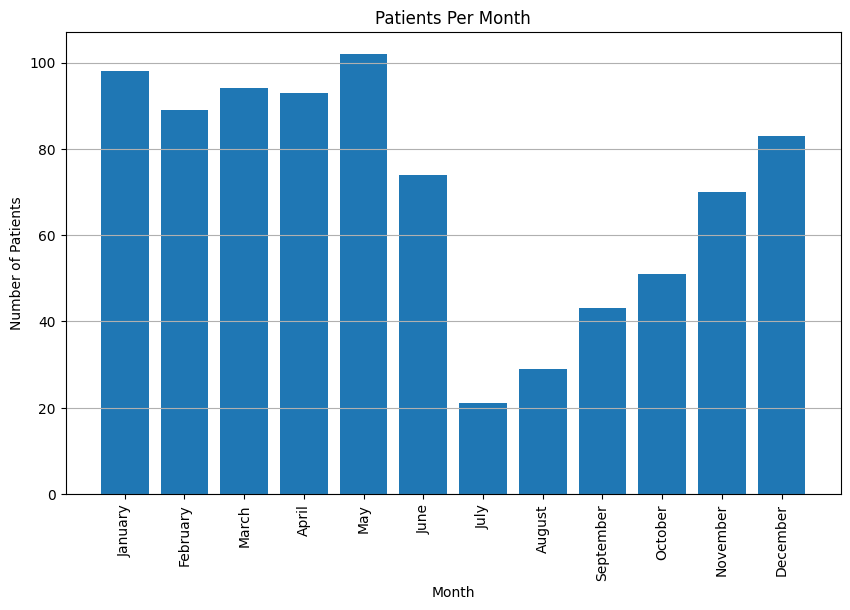

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Convert 'start_time' column to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
#Define the months
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Extract month from 'start_time'
df['month'] = df['start_time'].dt.month

# Group by month and count number of unique patients
patients_per_month = df.groupby('month')['patient_id'].nunique().reset_index(name='num_patients')

print(patients_per_month)
plt.figure(figsize=(10, 6))
plt.bar(patients_per_month['month'], patients_per_month['num_patients'])
plt.xlabel('Month')
plt.ylabel('Number of Patients')
plt.title('Patients Per Month')
plt.xticks(range(1, 13), labels=month_names, rotation=90)  # Rotate labels vertically
plt.grid(axis='y')  # Add grid lines along the y-axis
plt.show()

Total number of critical alarms per each month:
    month  ecghr_critical  ecgrr_critical  spo2_critical  total_critical
0       1            8430            2776           1583           12789
1       2            4274            3129           1838            9241
2       3            5799            5380           2016           13195
3       4            3948            6786           2732           13466
4       5            3622            4814           2208           10644
5       6            2253            6662           1466           10381
6       7            1278             353            535            2166
7       8             802             393            945            2140
8       9            4478            1355           1084            6917
9      10            1746            1676            967            4389
10     11            2892            2278           1594            6764
11     12            4264            2351           1955            8570


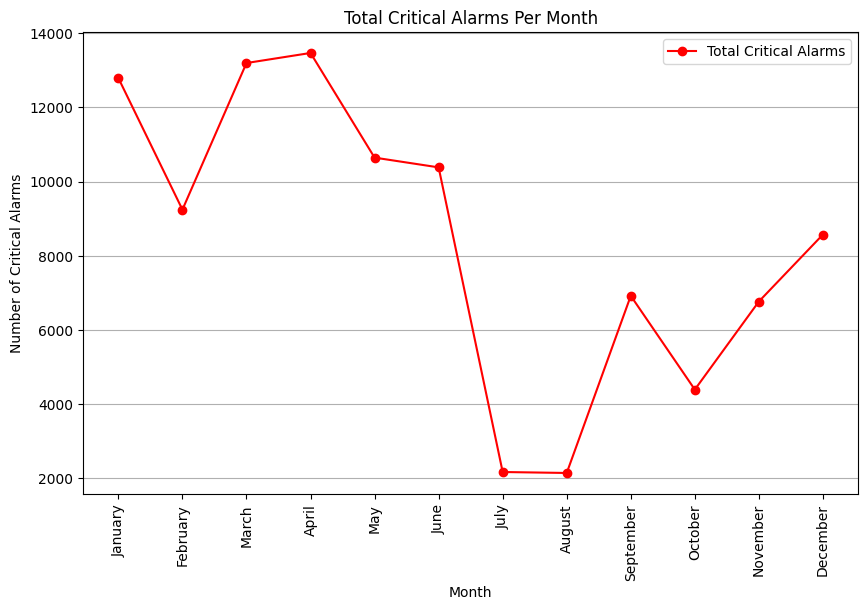

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Convert 'start_time' column to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract month from 'start_time'
df['month'] = df['start_time'].dt.month
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Filter for critical alarms based on thresholds
ecghr_critical = df[(df['signal'] == 'ECGHR') & ((df['value'] < 70) | (df['value'] > 220))]
ecgrr_critical = df[(df['signal'] == 'ECGRR') & ((df['value'] < 10) | (df['value'] > 100))]
spo2_critical = df[(df['signal'] == 'SPO2') & (df['value'] < 85)]

# Group by month and count number of critical alarms
ecghr_critical_per_month = ecghr_critical.groupby('month').size().reset_index(name='ecghr_critical')
ecgrr_critical_per_month = ecgrr_critical.groupby('month').size().reset_index(name='ecgrr_critical')
spo2_critical_per_month = spo2_critical.groupby('month').size().reset_index(name='spo2_critical')

# Merge the DataFrames to get a single DataFrame with critical alarms per month
critical_alarms_per_month = pd.merge(ecghr_critical_per_month, ecgrr_critical_per_month, on='month', how='outer')
critical_alarms_per_month = pd.merge(critical_alarms_per_month, spo2_critical_per_month, on='month', how='outer').fillna(0)

# Calculate total number of critical alarms per month
critical_alarms_per_month['total_critical'] = critical_alarms_per_month['ecghr_critical'] + \
                                              critical_alarms_per_month['ecgrr_critical'] + \
                                              critical_alarms_per_month['spo2_critical']

print("Total number of critical alarms per each month:")
print(critical_alarms_per_month)

# Plot critical alarms per month
plt.figure(figsize=(10, 6))
plt.plot(critical_alarms_per_month['month'], critical_alarms_per_month['total_critical'], marker='o', color='red', label='Total Critical Alarms')
plt.xlabel('Month')
plt.ylabel('Number of Critical Alarms')
plt.title('Total Critical Alarms Per Month')
plt.xticks(range(1, 13), labels=month_names, rotation=90)  # Rotate labels vertically
plt.grid(axis='y')  # Add grid lines along the y-axis
plt.legend()
# plt.grid(True)  # Add grid lines
plt.show()


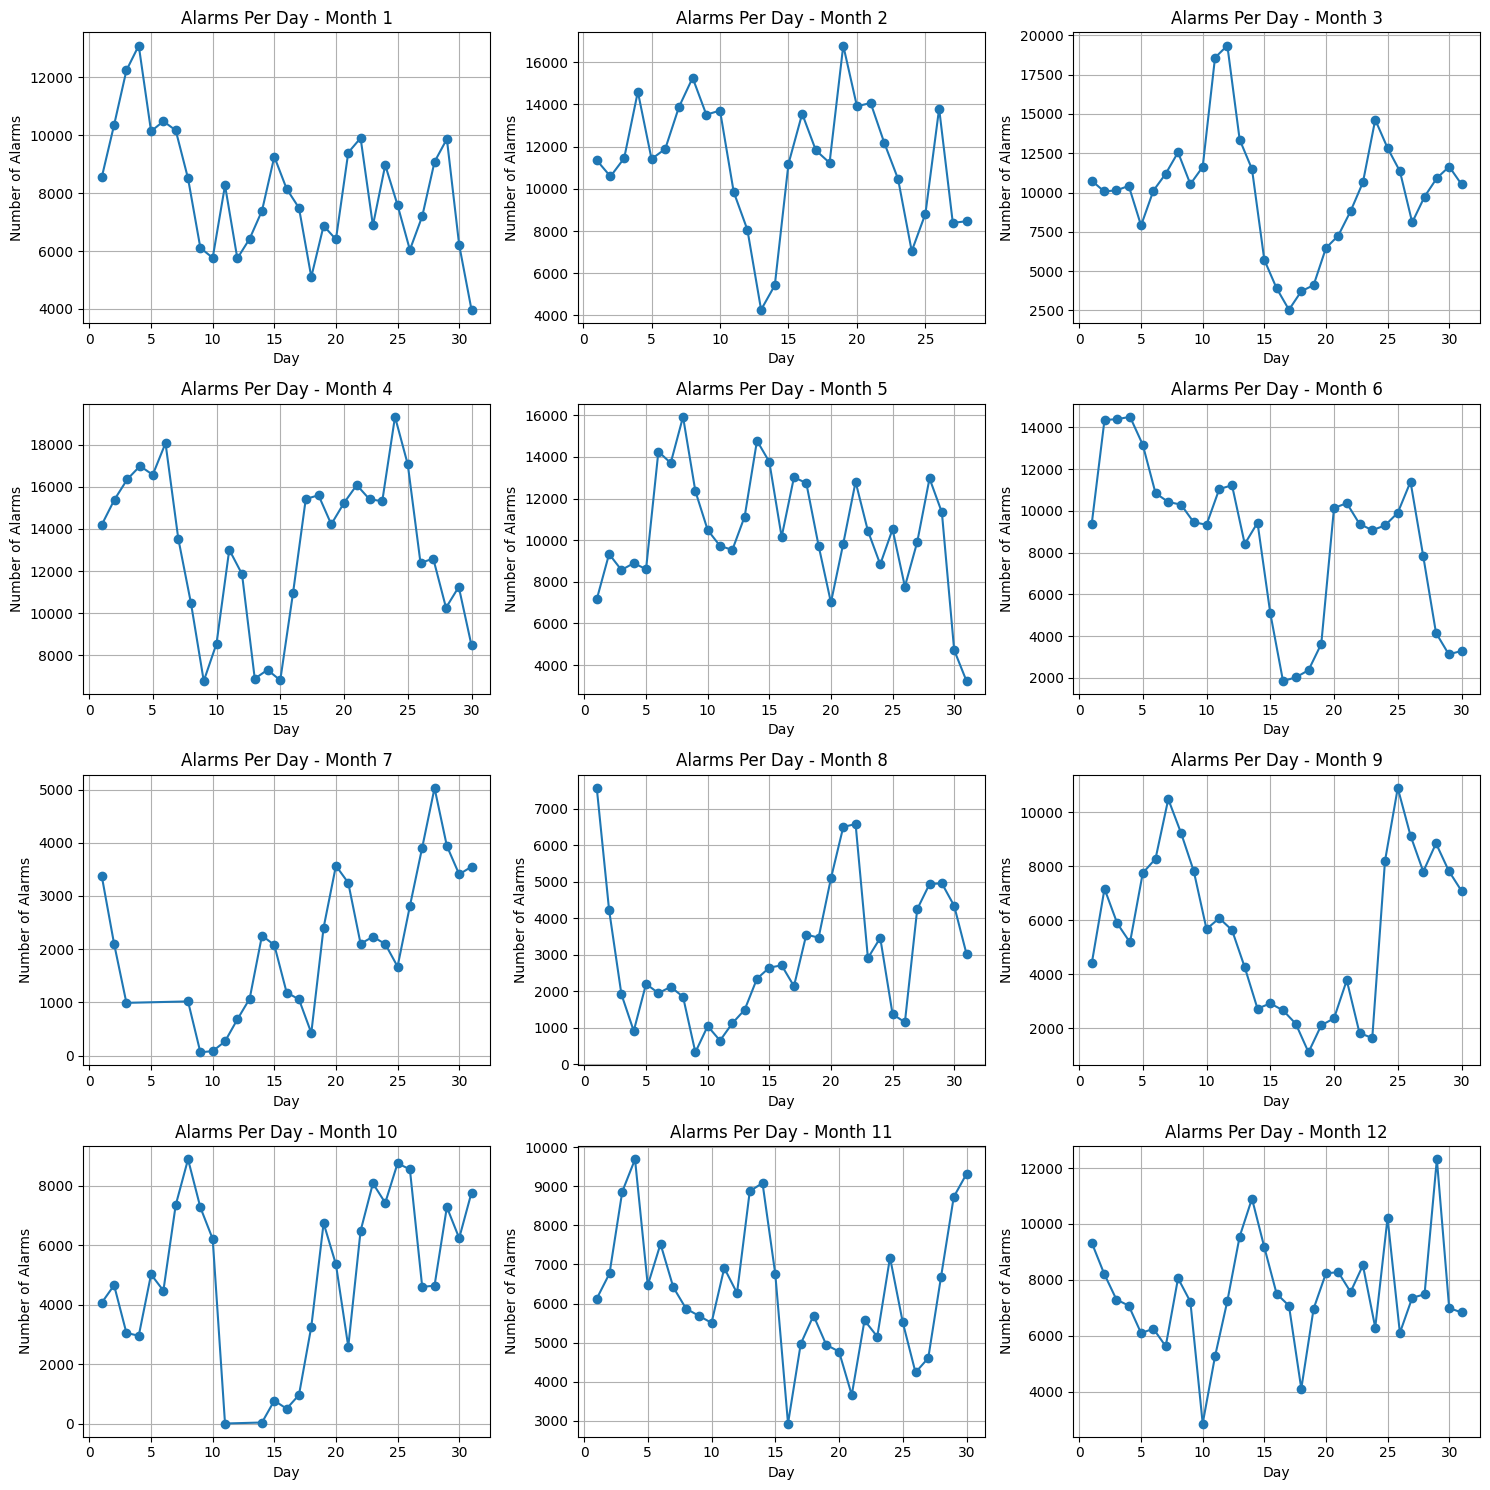

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'start_time' column to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract month and day from 'start_time'
df['month'] = df['start_time'].dt.month
df['day'] = df['start_time'].dt.day

# Group by month and day and count number of alarms
alarms_per_day_per_month = df.groupby(['month', 'day']).size().reset_index(name='num_alarms')

# Plot each month on a separate graph
fig, axs = plt.subplots(4, 3, figsize=(15, 15))  # Create a 4x3 grid of subplots for each month
axs = axs.flatten()  # Flatten the subplot array to iterate through it

for i, month in enumerate(range(1, 13)):
    monthly_data = alarms_per_day_per_month[alarms_per_day_per_month['month'] == month]
    ax = axs[i]  # Select the current subplot
    ax.plot(monthly_data['day'], monthly_data['num_alarms'], marker='o')
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Alarms')
    ax.set_title(f'Alarms Per Day - Month {month}')
    ax.grid(True)  # Add grid lines

# Adjust layout
plt.tight_layout()
plt.show()


    month  total_alarms
0       1        251691
1       2        317013
2       3        311005
3       4        392344
4       5        323236
5       6        259217
6       7         56591
7       8         92902
8       9        170938
9      10        143874
10     11        190771
11     12        231935
    month  total_short_alarms
0       1              150246
1       2              180329
2       3              185912
3       4              235132
4       5              187028
5       6              154164
6       7               30561
7       8               55108
8       9               99736
9      10               84066
10     11              113576
11     12              140902
    month  total_long_alarms
0       1             101445
1       2             136684
2       3             125093
3       4             157212
4       5             136208
5       6             105053
6       7              26030
7       8              37794
8       9              71202
9      1

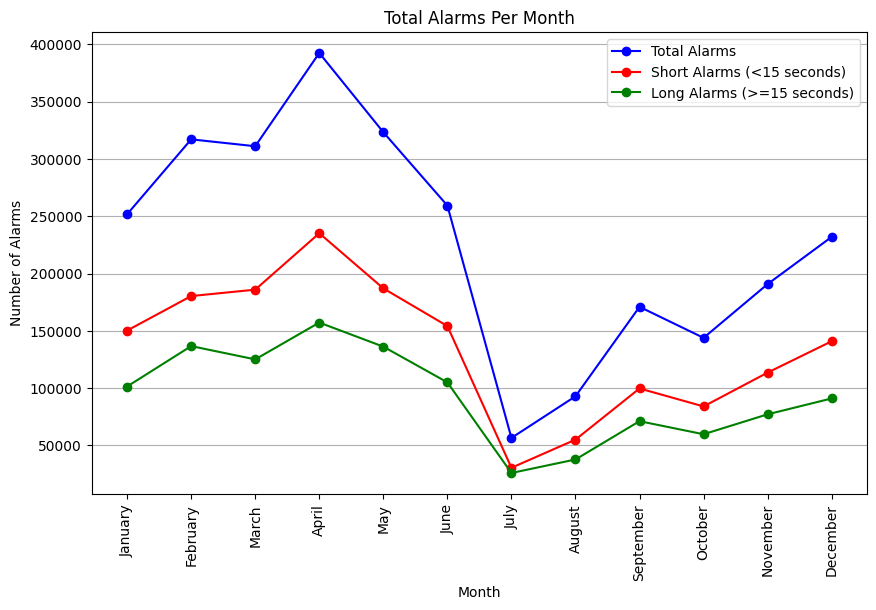

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'start_time' column to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract month and day from 'start_time'
df['month'] = df['start_time'].dt.month
df['day'] = df['start_time'].dt.day
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Calculate duration of each alarm in seconds
df['duration_seconds'] = (df['end_time'] - df['start_time']).dt.total_seconds()

# Group by month and day and count number of alarms
alarms_per_day_per_month = df.groupby(['month', 'day']).size().reset_index(name='num_alarms')

# Filter alarms less than 15 seconds duration for each month
short_alarms_per_month = df[df['duration_seconds'] < 15].groupby(['month', 'day']).size().reset_index(name='short_alarms')

long_alarms_per_month = df[df['duration_seconds'] >= 15].groupby(['month', 'day']).size().reset_index(name='long_alarms')

# Calculate total alarms per month
total_alarms_per_month = alarms_per_day_per_month.groupby('month')['num_alarms'].sum().reset_index(name='total_alarms')

# Calculate total long alarms per month
total_long_alarms_per_month = long_alarms_per_month.groupby('month')['long_alarms'].sum().reset_index(name='total_long_alarms')

# Calculate total short alarms per month
total_short_alarms_per_month = short_alarms_per_month.groupby('month')['short_alarms'].sum().reset_index(name='total_short_alarms')

# Merge total alarms and total long alarms per month
merged_data = total_alarms_per_month.merge(total_long_alarms_per_month, on='month')

# Subtract total long alarms from total alarms to get total short alarms
merged_data['total_short_alarms'] = merged_data['total_alarms'] - merged_data['total_long_alarms']
print(total_alarms_per_month)
print(total_short_alarms_per_month)
print(total_long_alarms_per_month)
# Plot total alarms per month
plt.figure(figsize=(10, 6))
plt.plot(merged_data['month'], merged_data['total_alarms'], marker='o', color='blue', label='Total Alarms')
plt.plot(merged_data['month'], merged_data['total_short_alarms'], marker='o', color='red', label='Short Alarms (<15 seconds)')
plt.plot(merged_data['month'], merged_data['total_long_alarms'], marker='o', color='green', label='Long Alarms (>=15 seconds)')
plt.xlabel('Month')
plt.ylabel('Number of Alarms')
plt.title('Total Alarms Per Month')
plt.xticks(range(1, 13), labels=month_names, rotation=90)  # Rotate labels vertically
plt.grid(axis='y')  # Add grid lines along the y-axis
plt.legend()
# plt.grid(True)  # Add grid lines
plt.show()


#VITAL SIGN DISTRIBUTION ANALYSIS

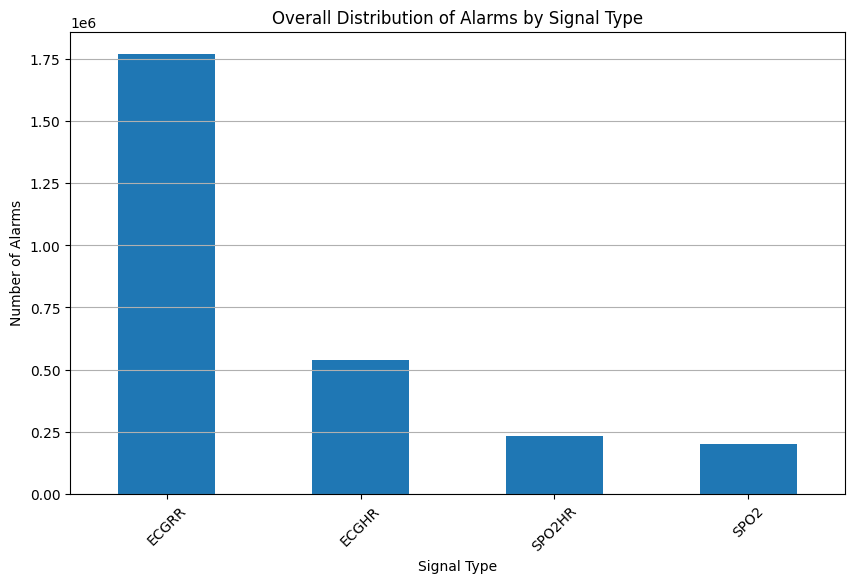

Most common alarms across all patients:
signal
ECGRR     1772219
ECGHR      537021
SPO2HR     230634
SPO2       201643
Name: count, dtype: int64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv('your_dataset.csv')

# Calculate the overall distribution of alarms by signal type
alarm_distribution = df['signal'].value_counts()

# Plot the overall distribution of alarms by signal type
plt.figure(figsize=(10, 6))
alarm_distribution.plot(kind='bar')
plt.title('Overall Distribution of Alarms by Signal Type')
plt.xlabel('Signal Type')
plt.ylabel('Number of Alarms')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Determine the most common alarms across all patients
most_common_alarms = alarm_distribution.head(10)
print("Most common alarms across all patients:")
print(most_common_alarms)

#PATIENT SPECIFIC ANALYSIS( PATIENTS WITH SIMILAR PATTERNS OF ALARM DATA)

In [12]:
# Group by patient_id and sum the count of alarms for each patient
patient_alarms_count = df.groupby('patient_id')['count'].sum()

# Sort patients based on the total number of alarms
sorted_patients = patient_alarms_count.sort_values(ascending=False)

# Select the top N patients with the highest alarm counts
top_n_patients = sorted_patients.head(10)  # Change 10 to any desired number of top patients

print("Top Patients with the Highest Number of Alarms:")
print(top_n_patients)


Top Patients with the Highest Number of Alarms:
patient_id
Z-H-0270    1769431
Z-H-0185    1349927
Z-H-0346    1235547
B-S-0034    1152959
B-S-0022    1089136
Z-H-0130    1059560
B-N-0025     982612
B-N-0006     982440
Z-H-0124     939020
B-S-0283     863052
Name: count, dtype: int64


###VITAL SIGNS VISUALIZATIONS

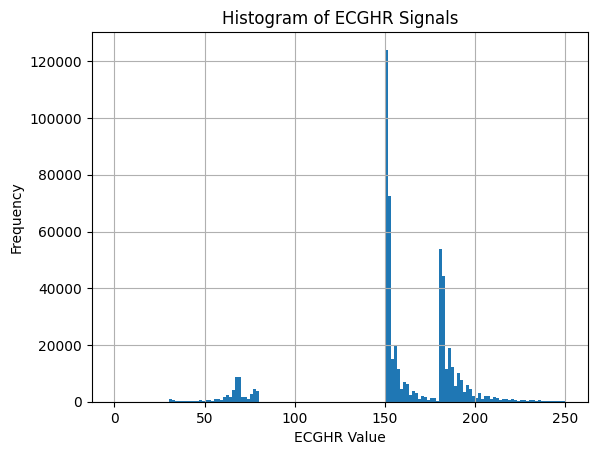

In [13]:
vitals_df_subset = df[df['signal'] == 'ECGHR']  # Filter rows where the signal is 'ECGHR'
vitals_df_subset = vitals_df_subset[(vitals_df_subset['value'] > 200) | (vitals_df_subset['value'] < 200) |(vitals_df_subset['value'] <70)]  # Filter values between 50 and 200
vitals_df_subset['value'].hist(bins=150)  # Plot histogram of 'value' column
plt.xlabel('ECGHR Value')
plt.ylabel('Frequency')
plt.title('Histogram of ECGHR Signals')
plt.show()

In [14]:
vitals_df_subset = df[df['signal'] == 'ECGHR']  # Filter rows where the signal is 'ECGHR'

# Filter values below 50, less than 200, and above 200
below_80_total = vitals_df_subset[vitals_df_subset['value'] < 80]['count'].sum()
less_than_200_total = vitals_df_subset[(vitals_df_subset['value'] < 200) & (vitals_df_subset['value'] < 70)]['count'].sum()
above_200_total = vitals_df_subset[vitals_df_subset['value'] > 200]['count'].sum()

print("Total count for values below 70:", below_80_total)
print("Total count for values less than 200:", less_than_200_total)
print("Total count for values above 200:", above_200_total)


Total count for values below 70: 1219771
Total count for values less than 200: 892415
Total count for values above 200: 613292


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Convert 'start_time' column to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract month from 'start_time'
df['month'] = df['start_time'].dt.month
month_df = pd.DataFrame({'month': range(1, 13), 'month_name': month})
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Filter ECGHR alarms for each condition
ecghr_above_200 = df[(df['signal'] == 'ECGHR') & (df['value'] > 200)]
ecghr_below_200 = df[(df['signal'] == 'ECGHR') & (df['value'] <= 200)]
ecghr_below_80 = df[(df['signal'] == 'ECGHR') & (df['value'] < 80)]

# Group by month and count number of alarms for each condition
ecghr_above_200_per_month = ecghr_above_200.groupby('month').size().reset_index(name='above_200_count')
ecghr_below_200_per_month = ecghr_below_200.groupby('month').size().reset_index(name='below_200_count')
ecghr_below_80_per_month = ecghr_below_80.groupby('month').size().reset_index(name='below_80_count')

# Merge DataFrames to get a single DataFrame with counts per month for each condition
ecghr_counts_per_month = pd.merge(ecghr_above_200_per_month, ecghr_below_200_per_month, on='month', how='outer')
ecghr_counts_per_month = pd.merge(ecghr_counts_per_month, ecghr_below_80_per_month, on='month', how='outer').fillna(0)

# Merge the month names with your DataFrame
ecghr_counts_per_month_with_names = pd.merge(ecghr_counts_per_month, month_df, on='month', how='left')

# Print the DataFrame with month names
print("Total ECGHR alarms per month for each condition:")
print(ecghr_counts_per_month_with_names)

Total ECGHR alarms per month for each condition:
    month  above_200_count  below_200_count  below_80_count month_name
0       1             2358            53302            9337    January
1       2             2590            67213            5235   February
2       3             3582            57931            6809      March
3       4             5193            66663            6640      April
4       5             2258            56905            4216        May
5       6             1986            44863            3080       June
6       7              324             8671            1656       July
7       8             1177            19212             446     August
8       9              848            35596            4320  September
9      10              435            31086            1780    October
10     11             1324            25829            3812   November
11     12             2356            45319            4498   December


#SPO2 ANALYSIS

In [16]:
subset= df[df['signal'] == 'SPO2']
alarm_subset_2=subset[(subset.value < 80)]
alarm_subset_2

,patient_id,signal,threshold,start_time,end_time,duration,value,count,month,day,duration_seconds
59,B-N-0001,SPO2,90,2022-07-13 16:22:53,2022-07-13 16:23:39,46.0,77.0,14,7,13,46.0
74,B-N-0002,SPO2,90,2022-07-14 06:14:02,2022-07-14 06:14:03,1.0,70.0,2,7,14,1.0
75,B-N-0002,SPO2,90,2022-07-14 06:14:31,2022-07-14 06:14:33,2.0,70.0,3,7,14,2.0
76,B-N-0002,SPO2,90,2022-07-14 06:14:41,2022-07-14 06:18:21,220.0,70.0,48,7,14,220.0
91,B-N-0002,SPO2,90,2022-07-14 09:43:56,2022-07-14 10:35:56,3120.0,65.0,134,7,14,3120.0
...,...,...,...,...,...,...,...,...,...,...,...
201381,Z-H-0386,SPO2,90,2023-06-29 21:55:14,2023-06-29 21:58:29,195.0,74.0,194,6,29,195.0
201430,Z-H-0386,SPO2,90,2023-06-30 05:20:40,2023-06-30 08:11:26,10246.0,65.0,338,6,30,10246.0
201491,Z-H-0387,SPO2,90,2023-06-29 23:39:16,2023-06-29 23:40:24,68.0,65.0,69,6,29,68.0
201601,Z-H-0387,SPO2,90,2023-07-01 11:36:37,2023-07-01 11:36:45,8.0,73.0,9,7,1,8.0


In [17]:
vitals_df_subset = df[df['signal'] == 'SPO2']  # Filter rows where the signal is 'ECGHR'

# Filter values below 50, less than 200, and above 200
below_80_total = vitals_df_subset[vitals_df_subset['value'] < 80]['count'].sum()
less_than_90_total = vitals_df_subset[vitals_df_subset['value'] <90]['count'].sum()
above_90_total = vitals_df_subset[vitals_df_subset['value'] >90]['count'].sum()

print("Total count for values below 80:", below_80_total)
print("Total count for values less than 90:", less_than_90_total)
print("Total count for values above 90:", above_90_total)

Total count for values below 80: 1544733
Total count for values less than 90: 17357204
Total count for values above 90: 0


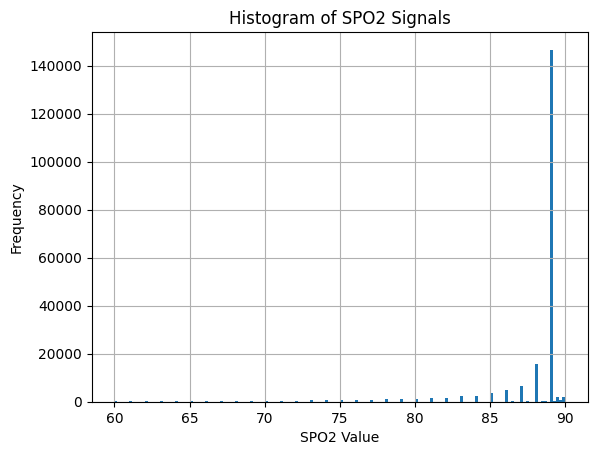

In [18]:
vitals_df_subset = df[df['signal'] == 'SPO2']  # Filter rows where the signal is 'SPO2'
# vitals_df_subset = vitals_df_subset(vitals_df_subset['value'] < 100)
vitals_df_subset['value'].hist(bins=150)  # Plot histogram of 'value' column
plt.xlabel('SPO2 Value')
plt.ylabel('Frequency')
plt.title('Histogram of SPO2 Signals')
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df['start_time'] = pd.to_datetime(df['start_time'])

# Extract month from 'start_time'
df['month'] = df['start_time'].dt.month

# Filter ECGHR alarms for each condition
SPO_above_80 = df[(df['signal'] == 'SPO2') & (df['value'] > 80)]
SPO_below_80 = df[(df['signal'] == 'SPO2') & (df['value'] <80)]

# Group by month and count number of alarms for each condition
spo_above_80_per_month = SPO_above_80.groupby('month').size().reset_index(name='above_80_count')
spo_below_80_per_month = SPO_below_80.groupby('month').size().reset_index(name='below_80_count')
SPO_counts_per_month = pd.merge(spo_above_80_per_month, spo_below_80_per_month, on='month', how='outer')
SPO_counts_per_month = pd.merge(spo_above_80_per_month, spo_below_80_per_month, on='month', how='outer').fillna(0)

print("Total SPO2 alarms per month for each condition:")
print(SPO_counts_per_month)



Total SPO2 alarms per month for each condition:
    month  above_80_count  below_80_count
0       1           14135             884
1       2           24009             923
2       3           20006            1084
3       4           28954            1412
4       5           22070            1142
5       6           24201             696
6       7            3512             277
7       8            7588             478
8       9           10834             548
9      10            7570             507
10     11           12344             843
11     12           15557            1025


###ECG HEARTRATE

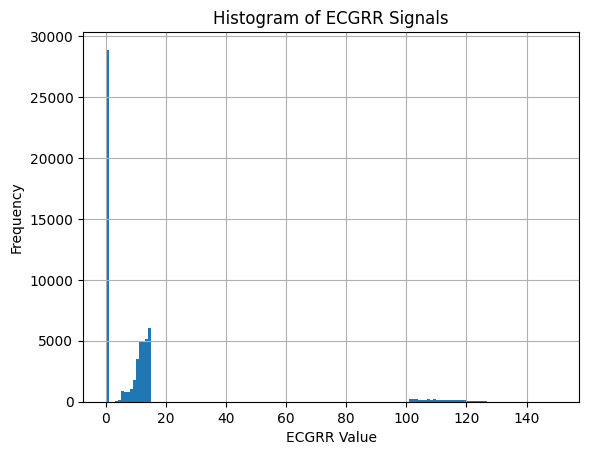

In [20]:
vitals_df_subset = df[df['signal'] == 'ECGRR']  # Filter rows where the signal is 'ECGHR'
vitals_df_subset = vitals_df_subset[(vitals_df_subset['value'] > 100) | (vitals_df_subset['value'] < 15) |(vitals_df_subset['value'] <10)]  # Filter values between 50 and 200
vitals_df_subset['value'].hist(bins=150)  # Plot histogram of 'value' column
plt.xlabel('ECGRR Value')
plt.ylabel('Frequency')
plt.title('Histogram of ECGRR Signals')
plt.show()

Total number of alarms in alarm_subset_2: 34350


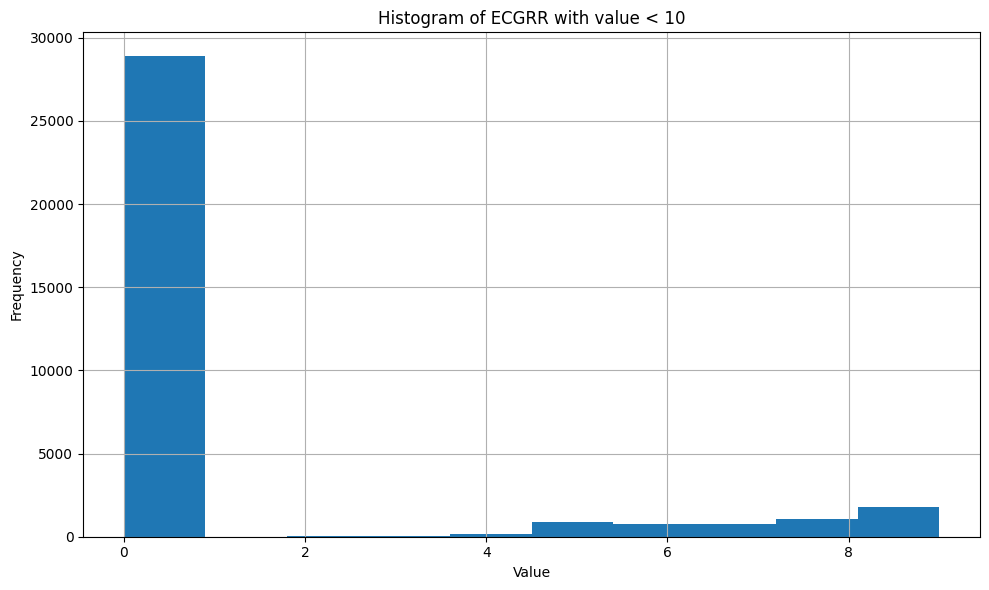

In [21]:
# Filter rows where 'signal' column equals 'ECGRR'
subset = df[df['signal'] == 'ECGRR']

# Further filter rows where 'value' is less than 10
alarm_subset_2 = subset[subset['value'] < 10]
total_alarms = alarm_subset_2['value'].count()
print("Total number of alarms in alarm_subset_2:", total_alarms)



# Plotting histogram
plt.figure(figsize=(10, 6))
alarm_subset_2['value'].hist(bins=10)  # Adjust bins as needed
plt.title('Histogram of ECGRR with value < 10')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


% delay alarm analysis

In [23]:
import tabulate
import matplotlib.pyplot as plt

# Filter alarms with a duration less than or equal to 15 seconds
filtered_alarms =df[df['duration'] <= 15]

# Define a list of signals you want to count
signals_to_count = ['SPO2', 'ECGRR', 'ECGHR', 'NIBP_mean', 'NIBP_Lower', 'NIBP_upper']

# Create an empty dictionary to store signal counts
signal_counts = {}

# Iterate over the list of signals
for signal in signals_to_count:
    # Count occurrences of the signal in the filtered alarms
    signal_count = filtered_alarms[filtered_alarms['signal'] == signal].shape[0]
    signal_counts[signal] = signal_count

# Print the signal counts
print("Signal Counts for Alarms with Duration <= 15 seconds:")
print(tabulate.tabulate(signal_counts.items(), headers=['Signal', 'Count'], tablefmt='psql'))

Signal Counts for Alarms with Duration <= 15 seconds:
+------------+---------+
| Signal     |   Count |
|------------+---------|
| SPO2       |   95922 |
| ECGRR      | 1060754 |
| ECGHR      |  385753 |
| NIBP_mean  |       0 |
| NIBP_Lower |       0 |
| NIBP_upper |       0 |
+------------+---------+


In [25]:
import tabulate
import matplotlib.pyplot as plt

# Filter alarms with a duration less than or equal to 15 seconds
filtered_alarms =df[df['duration'] <= 20]

# Define a list of signals you want to count
signals_to_count = ['SPO2', 'ECGRR', 'ECGHR', 'NIBP_mean', 'NIBP_Lower', 'NIBP_upper']

# Create an empty dictionary to store signal counts
signal_counts = {}

# Iterate over the list of signals
for signal in signals_to_count:
    # Count occurrences of the signal in the filtered alarms
    signal_count = filtered_alarms[filtered_alarms['signal'] == signal].shape[0]
    signal_counts[signal] = signal_count

# Print the signal counts
print("Signal Counts for Alarms with Duration 20 seconds:")
print(tabulate.tabulate(signal_counts.items(), headers=['Signal', 'Count'], tablefmt='psql'))

Signal Counts for Alarms with Duration 20 seconds:
+------------+---------+
| Signal     |   Count |
|------------+---------|
| SPO2       |  107893 |
| ECGRR      | 1219692 |
| ECGHR      |  413753 |
| NIBP_mean  |       0 |
| NIBP_Lower |       0 |
| NIBP_upper |       0 |
+------------+---------+


In [26]:
import tabulate
import matplotlib.pyplot as plt

# Filter alarms with a duration less than or equal to 15 seconds
filtered_alarms =df[df['duration'] > 25]

# Define a list of signals you want to count
signals_to_count = ['SPO2', 'ECGRR', 'ECGHR', 'NIBP_mean', 'NIBP_Lower', 'NIBP_upper']

# Create an empty dictionary to store signal counts
signal_counts = {}

# Iterate over the list of signals
for signal in signals_to_count:
    # Count occurrences of the signal in the filtered alarms
    signal_count = filtered_alarms[filtered_alarms['signal'] == signal].shape[0]
    signal_counts[signal] = signal_count

# Print the signal counts
print("Signal Counts for Alarms with Duration 25 seconds:")
print(tabulate.tabulate(signal_counts.items(), headers=['Signal', 'Count'], tablefmt='psql'))

Signal Counts for Alarms with Duration 25 seconds:
+------------+---------+
| Signal     |   Count |
|------------+---------|
| SPO2       |   83395 |
| ECGRR      |  444668 |
| ECGHR      |  101232 |
| NIBP_mean  |       0 |
| NIBP_Lower |       0 |
| NIBP_upper |       0 |
+------------+---------+


In [27]:
import tabulate
import matplotlib.pyplot as plt

# Filter alarms with a duration less than or equal to 15 seconds
filtered_alarms =df[df['duration'] > 45]

# Define a list of signals you want to count
signals_to_count = ['SPO2', 'ECGRR', 'ECGHR', 'NIBP_mean', 'NIBP_Lower', 'NIBP_upper']

# Create an empty dictionary to store signal counts
signal_counts = {}

# Iterate over the list of signals
for signal in signals_to_count:
    # Count occurrences of the signal in the filtered alarms
    signal_count = filtered_alarms[filtered_alarms['signal'] == signal].shape[0]
    signal_counts[signal] = signal_count

# Print the signal counts
print("Signal Counts for Alarms with Duration <= 15 seconds:")
print(tabulate.tabulate(signal_counts.items(), headers=['Signal', 'Count'], tablefmt='psql'))

Signal Counts for Alarms with Duration <= 15 seconds:
+------------+---------+
| Signal     |   Count |
|------------+---------|
| SPO2       |   61257 |
| ECGRR      |  235397 |
| ECGHR      |   61105 |
| NIBP_mean  |       0 |
| NIBP_Lower |       0 |
| NIBP_upper |       0 |
+------------+---------+


In [ ]:
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
parquet_file=r"C:/Users/user/Music/IMPALA3/alarms_df.parquet"

%MULTIREGRESSION ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the CSV file
input_file = 'merged_all_alarms.csv'  # Replace with your CSV file path

# # Load the CSV file into a pandas DataFrame
df = pd.read_csv(input_file)

# Create a one-hot encoded DataFrame for event categories
encoded_events = pd.get_dummies(df['events_column'], prefix='events_column')

# Combine the encoded features with the original data
data_encoded = pd.concat([df[['value']], encoded_events], axis=1)

# Prepare the data for regression analysis
X = data_encoded.drop(['value'], axis=1)  # Features
y = data_encoded['value']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Add constant to the features matrix (for intercept)
X_train = sm.add_constant(X_train)

# Fit the multiple regression model
regression_model = sm.OLS(y_train, X_train)
results = regression_model.fit()

# Print summary of regression results
print(results.summary())
# Predict on the testing data
import matplotlib.pyplot as plt

# Predict on the testing data
X_test = sm.add_constant(X_test)  # Add constant to testing features matrix
y_pred = results.predict(X_test)  # Predicted values

# Plot observed vs expected values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Observed Values')
plt.ylabel('Expected Values')
plt.title('Observed vs Expected Values')
plt.show()

# Plot standardized coefficients
standardized_coefficients = results.params / results.bse
plt.figure(figsize=(8, 6))
plt.bar(X.columns, standardized_coefficients[1:])  # Exclude intercept
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Features')
plt.ylabel('Standardized Coefficients')
plt.title('Standardized Coefficients')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# import dash
# from dash import dcc, html
# import plotly.graph_objs as go
# import pandas as pd

# # Assuming the data is stored in a DataFrame called df

# # Total alarms per patient
# total_alarms_per_patient = df.groupby('patient_id').size().reset_index(name='total_alarms')

# # Total alarms per patient for critical conditions (ECGHR > 220 or ECGRR > 100)
# critical_conditions = df[(df['signal'] == 'ECGHR') & (df['value'] > 220) | (df['signal'] == 'ECGRR') & (df['value'] > 100)]
# critical_alarms_per_patient = critical_conditions.groupby('patient_id').size().reset_index(name='critical_alarms')

# # Merge the two DataFrames to combine total alarms and critical alarms per patient
# total_alarms_summary = pd.merge(total_alarms_per_patient, critical_alarms_per_patient, on='patient_id', how='left').fillna(0)

# # Create a Plotly Dash app
# app = dash.Dash(__name__)

# # Define the layout of the dashboard
# app.layout = html.Div([
#     dcc.Graph(
#         id='alarms-graph',
#         figure={
#             'data': [
#                 {'x': total_alarms_summary['patient_id'], 'y': total_alarms_summary['total_alarms'], 'type': 'line', 'name': 'Total Alarms'},
#                 {'x': total_alarms_summary['patient_id'], 'y': total_alarms_summary['critical_alarms'], 'type': 'line', 'name': 'Critical Alarms'}
#             ],
#             'layout': {
#                 'title': 'Total and Critical Alarms per Patient',
#                 'xaxis': {'title': 'Patient ID'},
#                 'yaxis': {'title': 'Number of Alarms'}
#             }
#         }
#     )
# ])

# # Run the app
# if __name__ == '__main__':
#     app.run_server(debug=True)


In [ ]:
import dash
from dash import dcc, html
import plotly.graph_objs as go
import pandas as pd

# Assuming the data is stored in a DataFrame called df

# Total alarms per patient for critical conditions (ECGHR > 220 or ECGRR > 100)
critical_conditions = df[(df['signal'] == 'ECGHR') & (df['value'] > 220) | (df['signal'] == 'ECGRR') & (df['value'] > 100)]
critical_alarms_per_patient = critical_conditions.groupby('patient_id').size().reset_index(name='critical_alarms')

# Create a Plotly Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    dcc.Graph(
        id='critical-alarms-graph',
        figure={
            'data': [
                {'x': critical_alarms_per_patient['patient_id'], 'y': critical_alarms_per_patient['critical_alarms'], 'type': 'bar', 'name': 'Critical Alarms'}
            ],
            'layout': {
                'title': 'Critical Alarms per Patient',
                'xaxis': {'title': 'Patient ID'},
                'yaxis': {'title': 'Number of Alarms'}
            }
        }
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


PATIENT SPECIFIC ANALYSIS( PATIENTS WITH SIMILAR PATTERNS OF ALARM DATA)

THRESHOLD ANALYSIS
we define low and high thresholds for ECGHR and ECGRR signals and only a low threshold for SPO2 signal.
We create new columns in the dataframe to indicate whether a threshold breach occurred for each alarm.
We plot the distribution of threshold breaches by signal type to visualize the frequency of breaches.
We identify common threshold breaches by counting the occurrences of breaches for each signal and threshold combination and printing the results

Critical Alarm Analysis:

Identify critical alarms (e.g., those related to vital signs such as ECGHR, ECGRR, SPO2) and analyze their frequency and distribution.
Determine if there are specific thresholds that trigger critical alarms more frequently.

Number of critical alarms for ECGHR below threshold: 36502
Number of critical alarms for ECGHR above threshold: 7284
Number of critical alarms for ECGRR below threshold: 34350
Number of critical alarms for ECGRR above threshold: 3603
Number of critical alarms for SPO2 below threshold: 18923
Number of critical alarms for SPO2 above threshold: 0


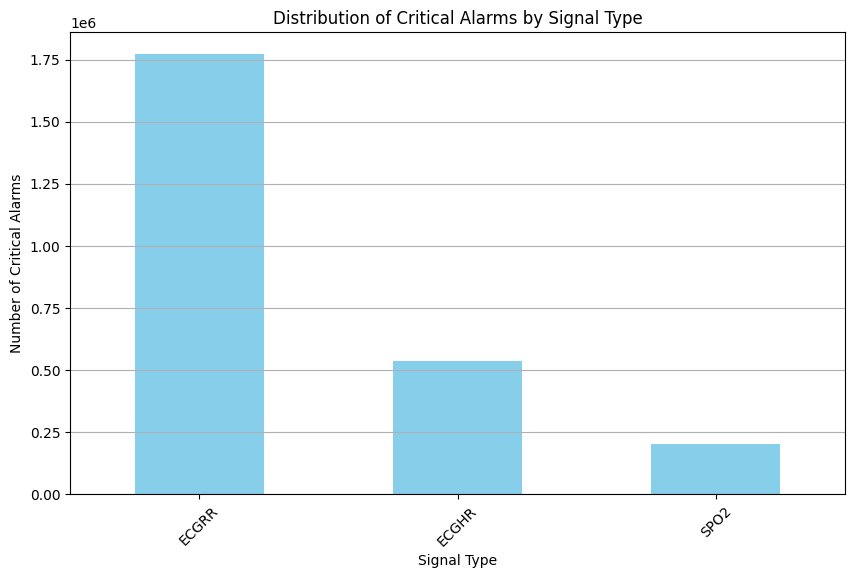

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv('your_dataset.csv')

# Define critical signals and their corresponding thresholds
critical_signals = ['ECGHR', 'ECGRR', 'SPO2']
thresholds = {
    'ECGHR': {'low': 70, 'high': 220},
    'ECGRR': {'low': 10, 'high': 100},
    'SPO2': {'low': 85}
}

# Filter critical alarms
critical_alarms = df[df['signal'].isin(critical_signals)]

# Identify critical alarms exceeding thresholds
for signal, threshold in thresholds.items():
    low_threshold_breaches = critical_alarms[(critical_alarms['signal'] == signal) & (critical_alarms['value'] < threshold.get('low', float('-inf')))]
    high_threshold_breaches = critical_alarms[(critical_alarms['signal'] == signal) & (critical_alarms['value'] > threshold.get('high', float('inf')))]
    
    print(f"Number of critical alarms for {signal} below threshold: {len(low_threshold_breaches)}")
    print(f"Number of critical alarms for {signal} above threshold: {len(high_threshold_breaches)}")

# Plot the distribution of critical alarms by signal type
plt.figure(figsize=(10, 6))
critical_alarms['signal'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Critical Alarms by Signal Type')
plt.xlabel('Signal Type')
plt.ylabel('Number of Critical Alarms')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Alarm Duration Analysis:

Analyze the duration of alarms to identify patterns or trends.
Determine if certain types of alarms tend to be shorter or longer in duration.

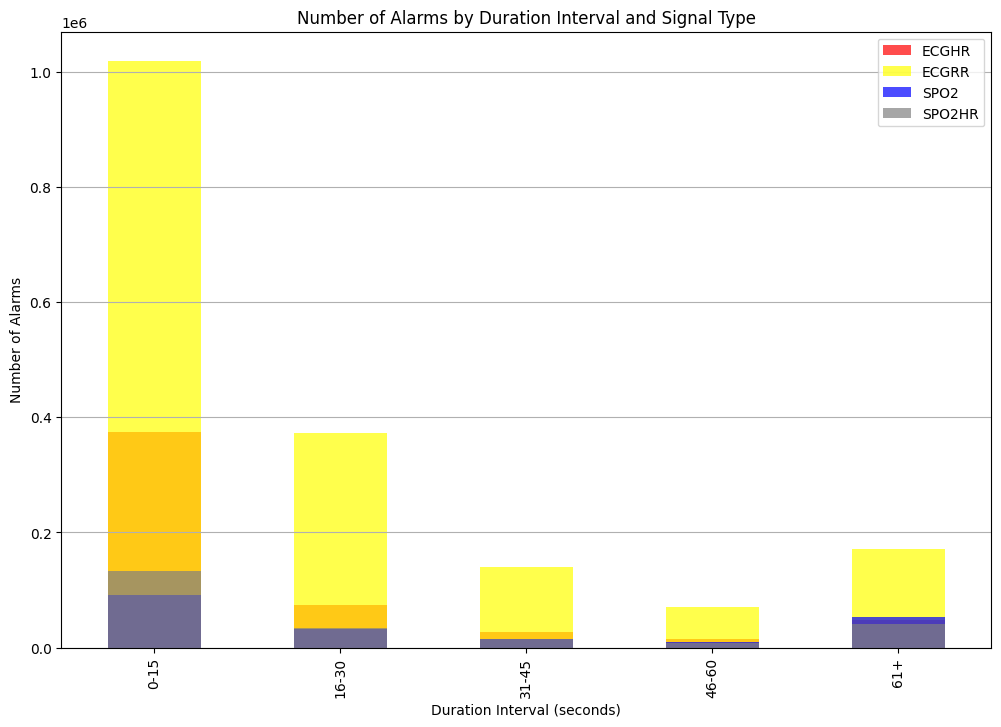

Number of alarms for each signal:
signal
ECGRR     1772219
ECGHR      537021
SPO2HR     230634
SPO2       201643
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv('your_dataset.csv')

# Define the duration intervals
duration_intervals = [0, 15, 30, 45, 60, float('inf')]
interval_labels = ['0-15', '16-30', '31-45', '46-60', '61+']

# Define a color palette for each signal type
color_palette = {
    'ECGHR': 'red',
    'ECGRR': 'yellow',
    'SPO2': 'blue',
    # Add more signal types and colors as needed
}

# Categorize the duration into intervals for each signal type
df['duration_interval'] = pd.cut(df['duration'], bins=duration_intervals, labels=interval_labels, right=False)

# Plot and print the number of alarms within each interval for each signal type
plt.figure(figsize=(12, 8))
for signal, signal_df in df.groupby('signal'):
    alarm_counts = signal_df['duration_interval'].value_counts().reindex(interval_labels, fill_value=0)
    alarm_counts.plot(kind='bar', alpha=0.7, label=signal, color=color_palette.get(signal, 'gray'))

plt.title('Number of Alarms by Duration Interval and Signal Type')
plt.xlabel('Duration Interval (seconds)')
plt.ylabel('Number of Alarms')
plt.legend()
plt.grid(axis='y')
plt.show()

# Print the number of each signal
signal_counts = df['signal'].value_counts()
print("Number of alarms for each signal:")
print(signal_counts)
